In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install dmba
!pip install statsmodels
!pip install sklearn

'\n!pip install numpy\n!pip install pandas\n!pip install matplotlib\n!pip install sklearn\n!pip install dmba\n!pip install statsmodels\n!pip install sklearn\n'

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/medical_clean.csv")
outcome = 'TotalCharge'

df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 
         'State', 'County', 'Zip', 'Lat', 'Lng', 'Interaction', 'TimeZone'], axis=1)

cat_columns = df.select_dtypes(exclude="number").columns

# Give categorical columns a numeric value
for col in cat_columns:
    df[col] = pd.Categorical(df[col])
    df[col] = df[col].cat.codes

df.head()

Population  Area  Job  Children  Age    Income  Marital  Gender  ReAdmis  \
0        2951     1  478         1   53  86575.93        0       1        0   
1       11303     2  124         3   51  46805.99        1       0        0   
2       17125     1   94         3   53  14370.14        4       0        0   
3        2162     1  177         0   78  39741.49        1       1        0   
4        5287     0  285         1   22   1209.56        4       0        0   

   VitD_levels  ...  TotalCharge  Additional_charges  Item1  Item2  Item3  \
0    19.141466  ...  3726.702860        17939.403420      3      3      2   
1    18.940352  ...  4193.190458        17612.998120      3      4      3   
2    18.057507  ...  2434.234222        17505.192460      2      4      4   
3    16.576858  ...  2127.830423        12993.437350      3      5      5   
4    17.439069  ...  2113.073274         3716.525786      2      1      3   

   Item4  Item5  Item6  Item7  Item8  
0      2      4      3      3      4  
1      4      4      4      3      3  
2      4      3      4      3      3  
3      3      4      5      5      5  
4      3      5      3      4      3  

[5 rows x 39 columns]

In [6]:
# export prepared data
df.to_csv('data/medical_prepared.csv')

# Univariate Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

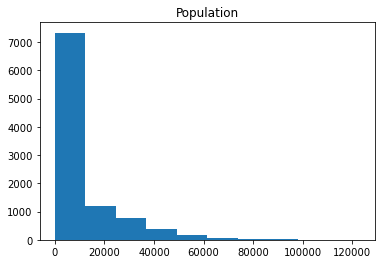

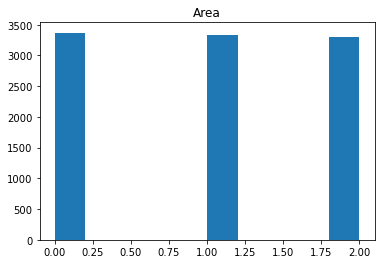

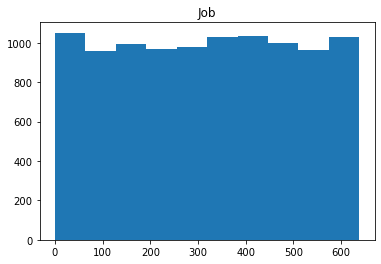

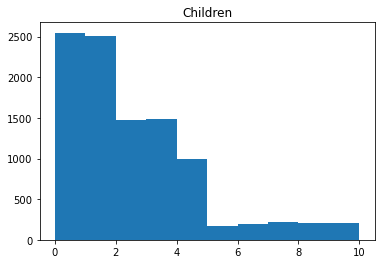

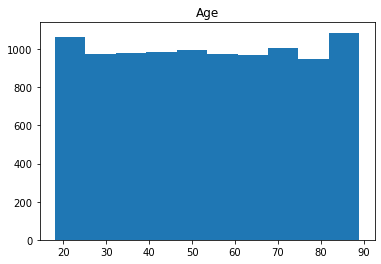

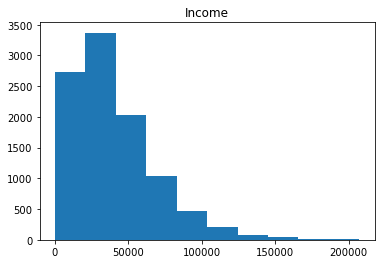

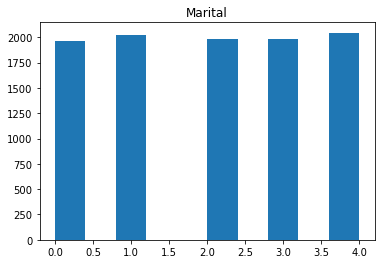

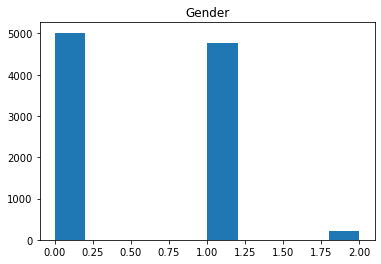

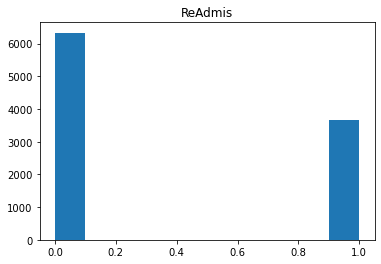

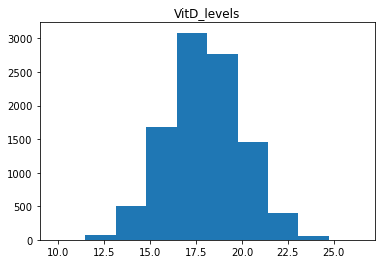

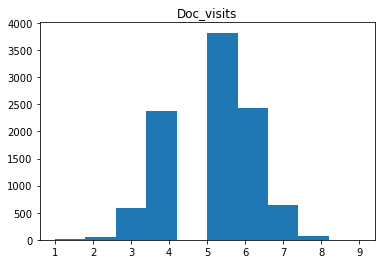

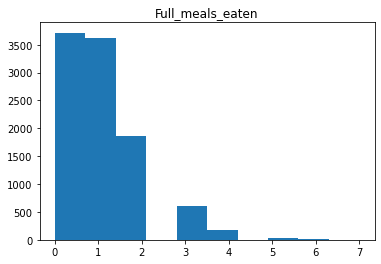

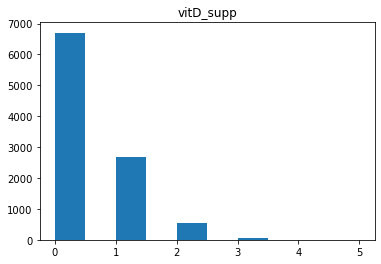

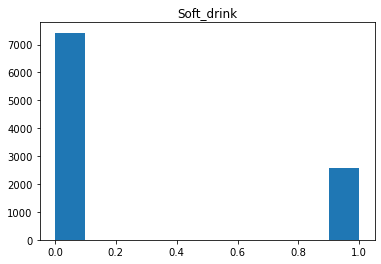

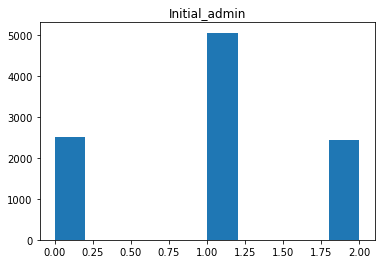

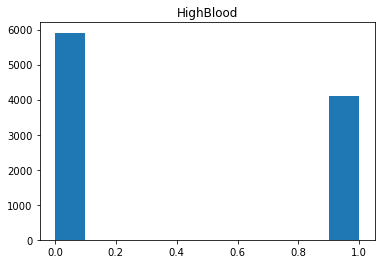

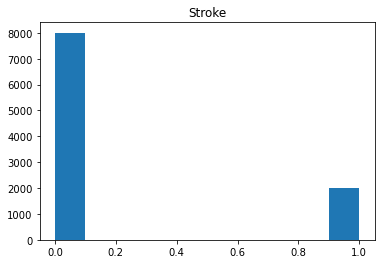

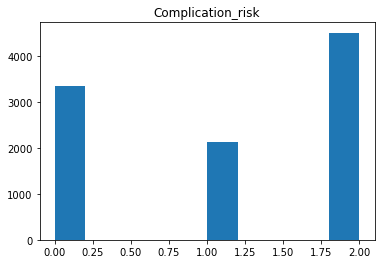

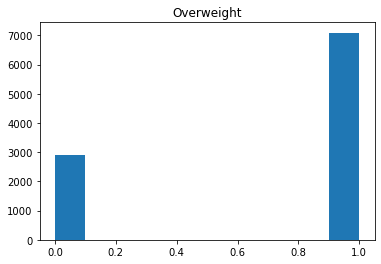

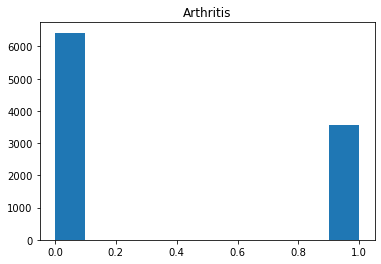

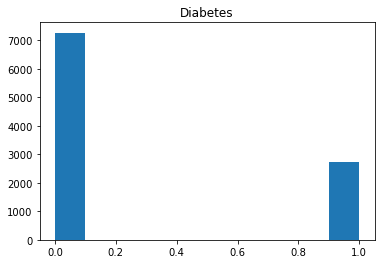

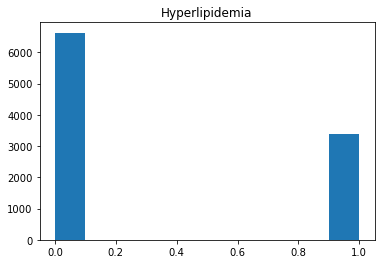

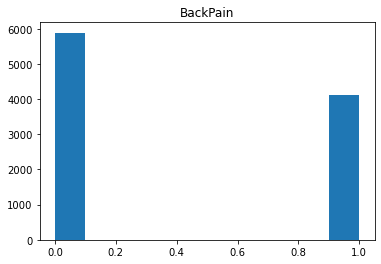

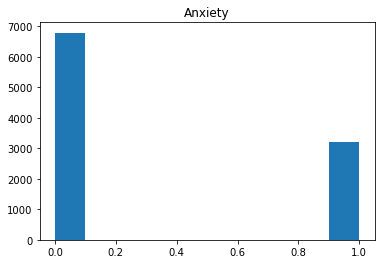

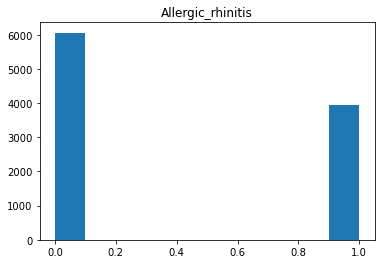

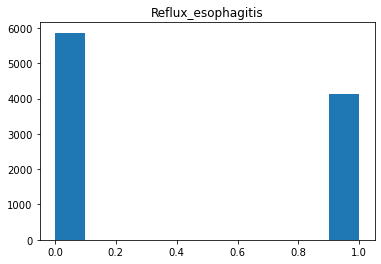

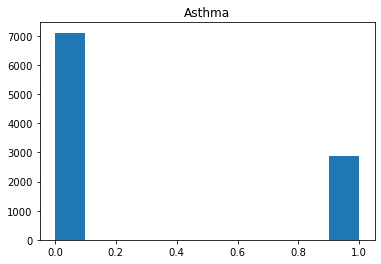

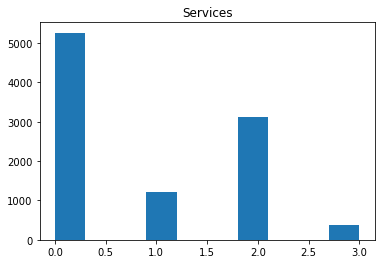

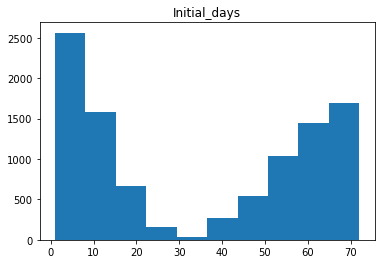

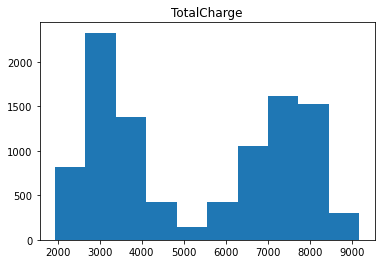

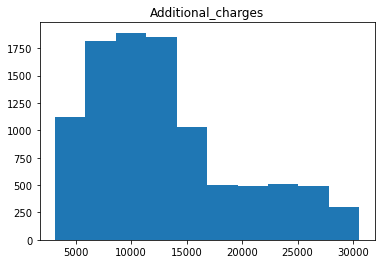

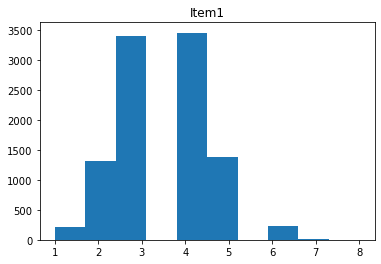

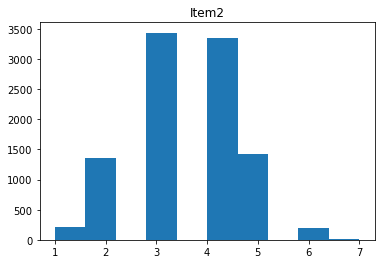

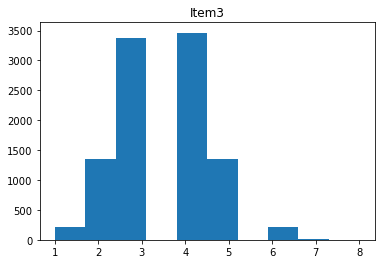

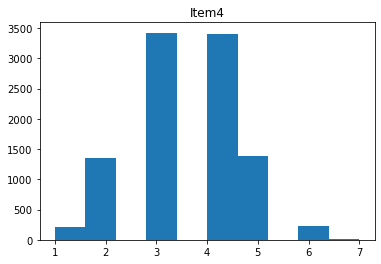

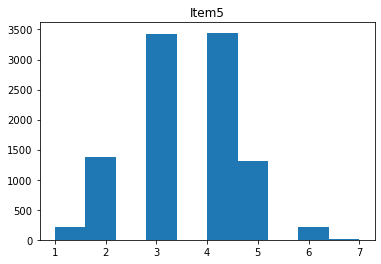

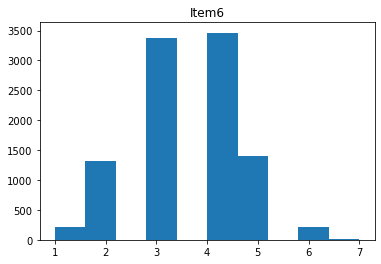

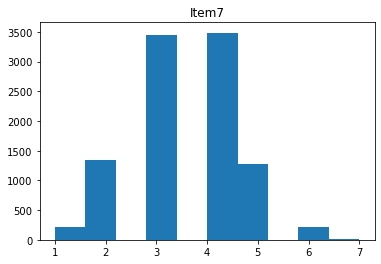

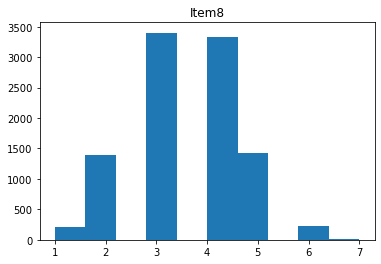

In [8]:
# perform univariate analysis on all columns

for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    
    path = 'plots/%s.png'%col
    plt.gcf().savefig(path)
    plt.show()


# Bivariate Analysis

Since we are predicting Initial_days we will include Initial_days in our bivariate analysis of the features

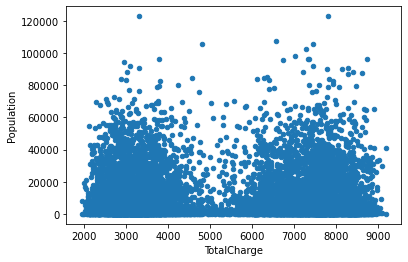

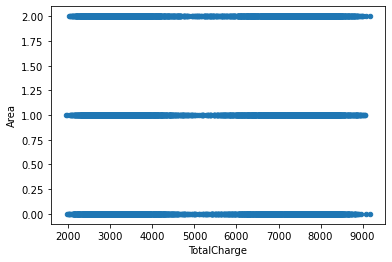

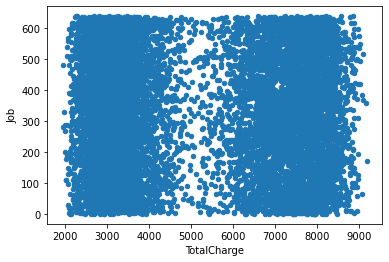

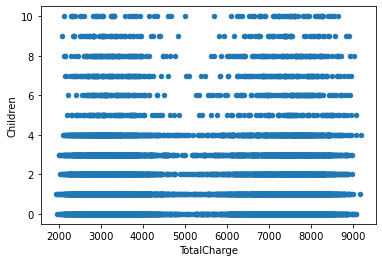

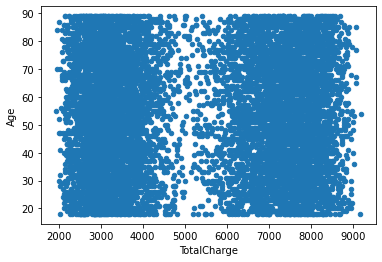

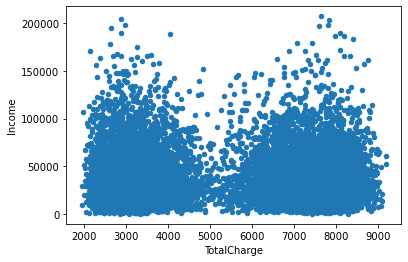

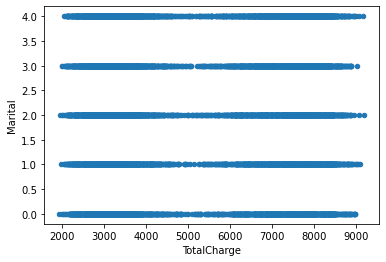

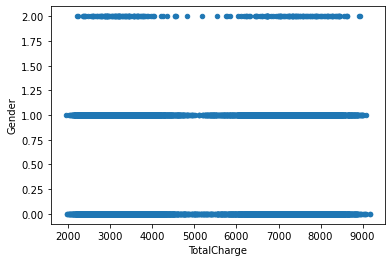

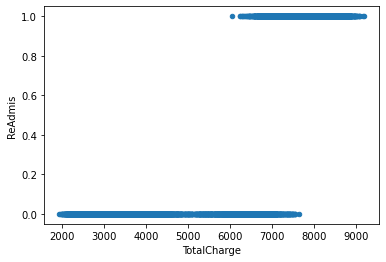

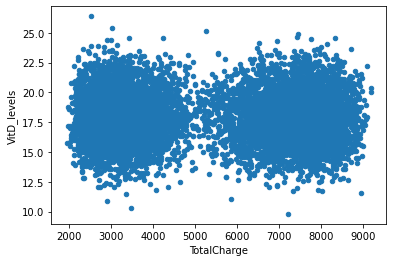

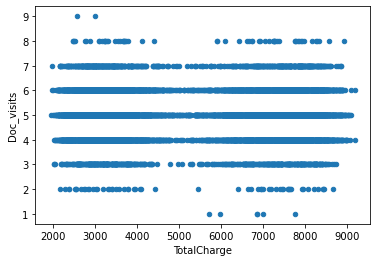

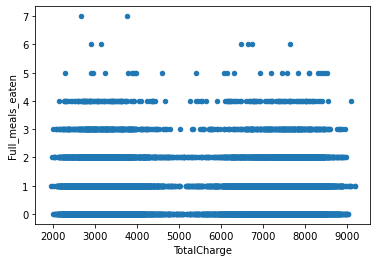

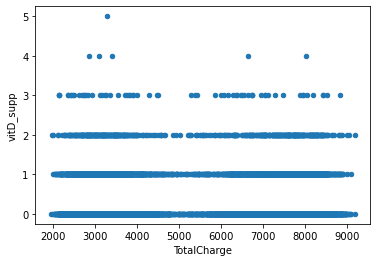

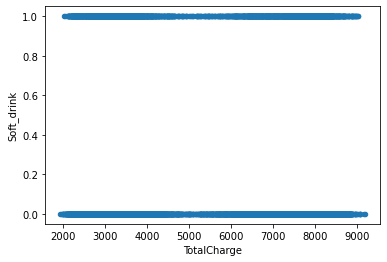

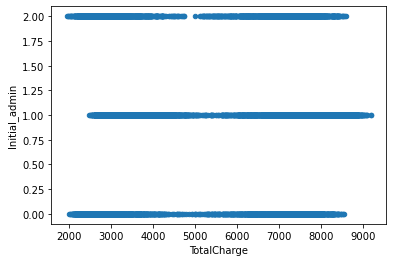

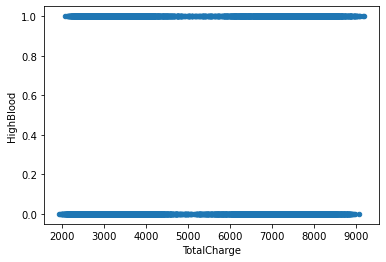

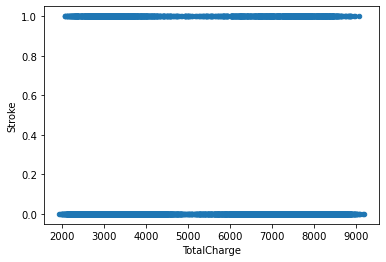

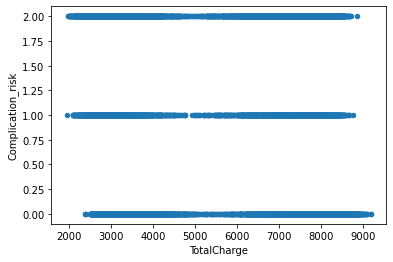

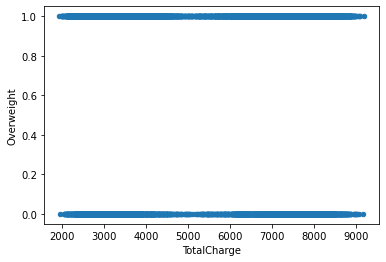

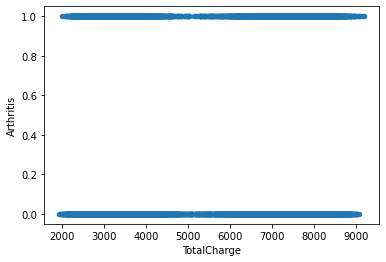

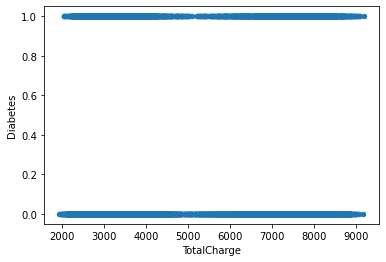

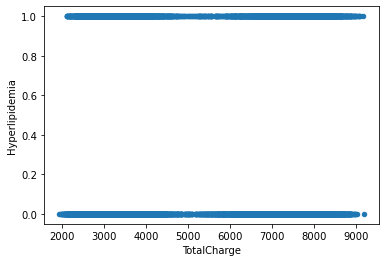

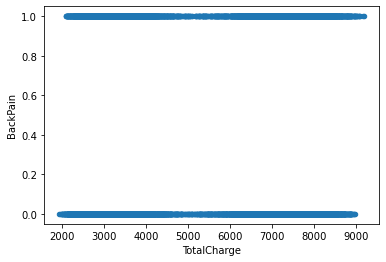

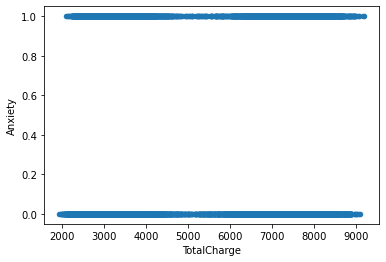

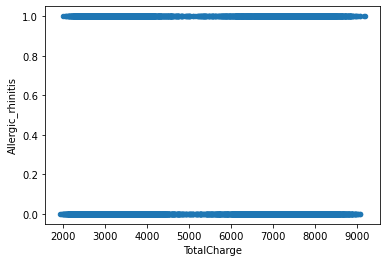

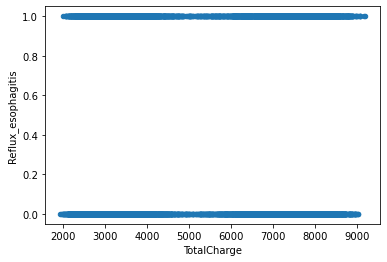

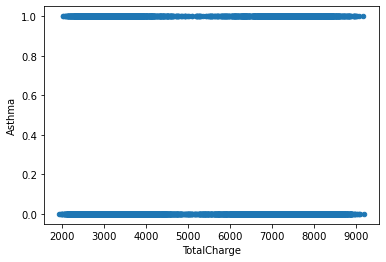

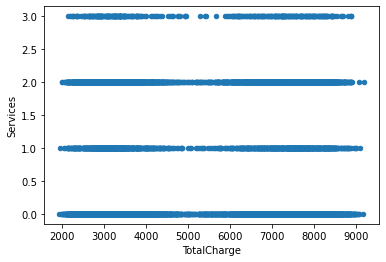

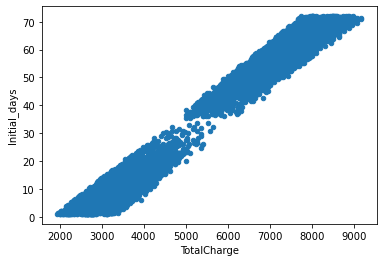

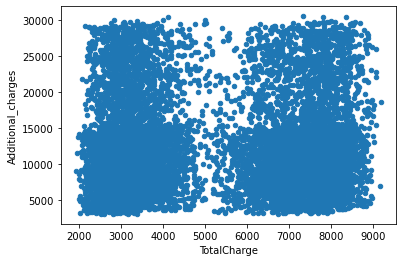

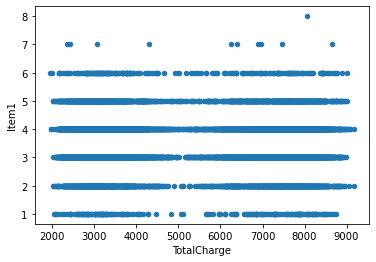

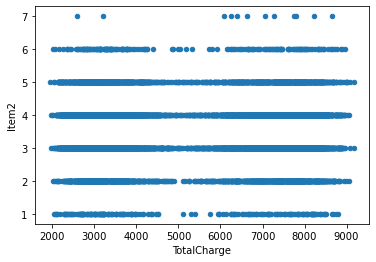

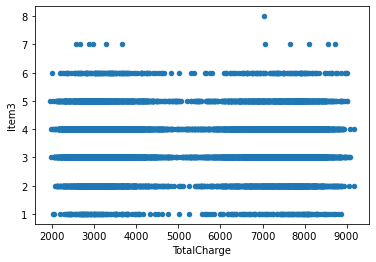

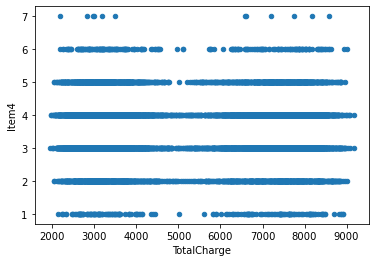

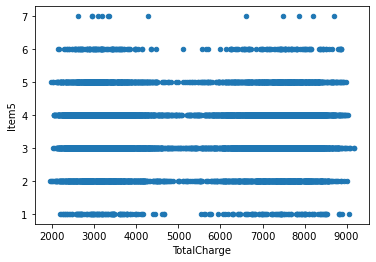

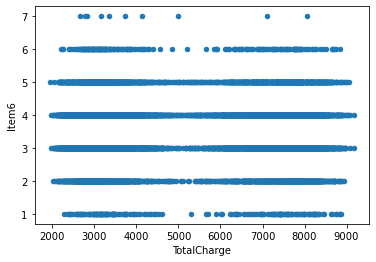

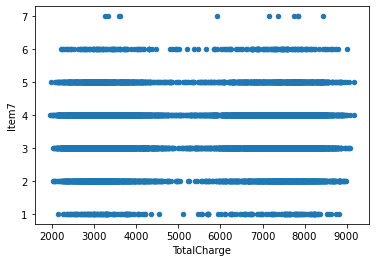

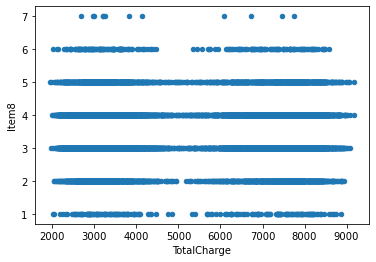

In [9]:
for col in df:
    if col != outcome:
        df.plot(kind='scatter', x=outcome, y=col)
        
        path = 'plots/%s-%s.png'%(outcome,col)
        plt.gcf().savefig(path)
        plt.show()

## Correlation Matrix

In [7]:
correl = df.corr()
display(correl)

Population      Area       Job  Children       Age  \
Population            1.000000  0.016819 -0.005268  0.002462 -0.018987   
Area                  0.016819  1.000000  0.002513 -0.004164 -0.007530   
Job                  -0.005268  0.002513  1.000000 -0.015621 -0.009102   
Children              0.002462 -0.004164 -0.015621  1.000000  0.009836   
Age                  -0.018987 -0.007530 -0.009102  0.009836  1.000000   
Income                0.005426  0.010067  0.018433  0.007176 -0.012228   
Marital              -0.014382 -0.001309  0.002783 -0.020535 -0.002227   
Gender                0.009576  0.000293 -0.012618 -0.004791 -0.013305   
ReAdmis               0.020040  0.008438  0.005645  0.023532  0.015810   
VitD_levels           0.002651  0.033479  0.008496  0.009487  0.010315   
Doc_visits            0.012646 -0.000023  0.009892 -0.002292  0.006898   
Full_meals_eaten     -0.025608 -0.002296  0.011299  0.003835  0.008555   
vitD_supp             0.009781  0.006298  0.007079 -0.004319  0.010014   
Soft_drink            0.001816 -0.007841  0.016745  0.008426 -0.001337   
Initial_admin        -0.018571  0.015600 -0.002665 -0.001341 -0.013411   
HighBlood             0.009764  0.014193 -0.015476  0.001923  0.007147   
Stroke               -0.001690  0.000047 -0.001955  0.005123  0.012035   
Complication_risk    -0.008472 -0.001023  0.005076 -0.006496 -0.006306   
Overweight            0.003819 -0.005172 -0.006949 -0.013594 -0.008292   
Arthritis             0.000055 -0.003682  0.004336  0.007871  0.007110   
Diabetes             -0.009975 -0.022495  0.007126  0.022479  0.003694   
Hyperlipidemia       -0.006222  0.008353 -0.000792 -0.002909  0.003736   
BackPain              0.006437 -0.006182  0.002245 -0.007785  0.021081   
Anxiety              -0.014639  0.028368  0.015788  0.008362  0.006130   
Allergic_rhinitis     0.007681  0.016037 -0.000631 -0.019207  0.012092   
Reflux_esophagitis    0.014340  0.006288 -0.004715  0.005639 -0.019609   
Asthma               -0.001510 -0.004295 -0.011995  0.002324  0.009229   
Services             -0.009933 -0.001251 -0.004076  0.007670  0.012016   
Initial_days          0.017469  0.012432  0.006175  0.022467  0.016264   
TotalCharge           0.019188  0.014134  0.005959  0.024100  0.016876   
Additional_charges   -0.004820 -0.000536 -0.017485  0.013548  0.716854   
Item1                 0.014312 -0.001277 -0.002972  0.002138  0.005552   
Item2                 0.023612  0.003957  0.000669  0.001674  0.003967   
Item3                -0.001248  0.001747  0.008988 -0.002094  0.004709   
Item4                -0.004660 -0.007326 -0.007250  0.000728  0.003377   
Item5                 0.008705 -0.020585  0.021222  0.012564 -0.008827   
Item6                 0.008159 -0.002907 -0.008718 -0.008546 -0.002087   
Item7                 0.010034 -0.017908  0.002031  0.004156  0.009423   
Item8                -0.000220 -0.007678 -0.005742 -0.019753 -0.003367   

                      Income   Marital    Gender   ReAdmis  VitD_levels  ...  \
Population          0.005426 -0.014382  0.009576  0.020040     0.002651  ...   
Area                0.010067 -0.001309  0.000293  0.008438     0.033479  ...   
Job                 0.018433  0.002783 -0.012618  0.005645     0.008496  ...   
Children            0.007176 -0.020535 -0.004791  0.023532     0.009487  ...   
Age                -0.012228 -0.002227 -0.013305  0.015810     0.010315  ...   
Income              1.000000 -0.010381  0.003568 -0.011504    -0.013115  ...   
Marital            -0.010381  1.000000 -0.006871  0.015036    -0.005928  ...   
Gender              0.003568 -0.006871  1.000000  0.012504    -0.007670  ...   
ReAdmis            -0.011504  0.015036  0.012504  1.000000     0.004083  ...   
VitD_levels        -0.013115 -0.005928 -0.007670  0.004083     1.000000  ...   
Doc_visits          0.013464 -0.008757 -0.005905  0.000246     0.010210  ...   
Full_meals_eaten   -0.011365 -0.002116  0.012057 -0.012172     0.023223  ...   
vitD_supp          

In [8]:
abs(df.corr())[outcome].sort_values(ascending=False)

TotalCharge           1.000000
Initial_days          0.987640
ReAdmis               0.843726
Complication_risk     0.084016
BackPain              0.035828
Arthritis             0.032932
Anxiety               0.031199
Additional_charges    0.029256
Reflux_esophagitis    0.026284
Children              0.024100
HighBlood             0.019910
Item1                 0.019706
Marital               0.019451
Population            0.019188
Allergic_rhinitis     0.018919
Hyperlipidemia        0.017565
vitD_supp             0.016924
Age                   0.016876
Income                0.014345
Full_meals_eaten      0.014306
Asthma                0.014290
Area                  0.014134
Overweight            0.012782
Diabetes              0.011524
Item6                 0.010480
Item4                 0.010318
Item3                 0.009051
Item8                 0.008250
Gender                0.007538
Services              0.007425
Item2                 0.006055
Job                   0.005959
Initial_

<AxesSubplot:>

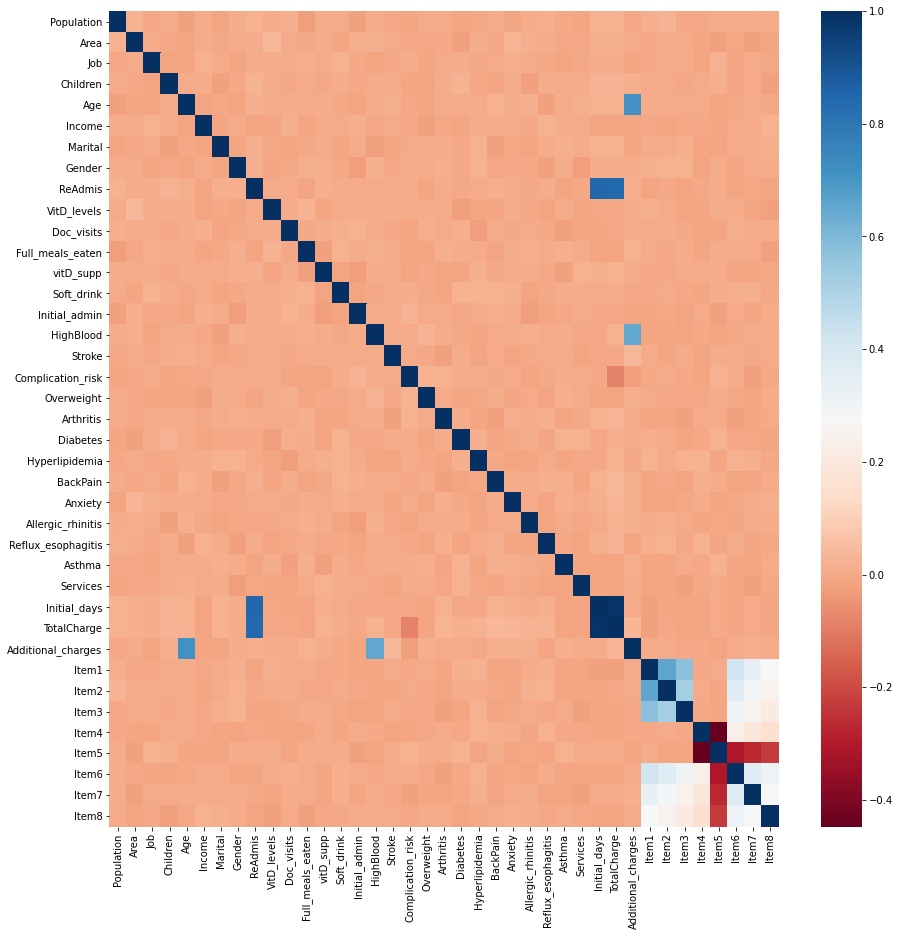

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correl, xticklabels = correl.columns, yticklabels = correl.columns, cmap='RdBu')

# Regression Models

We start with a regression model with all of the features

In [20]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from dmba import AIC_score

In [21]:
X = df.loc[:,df.columns!=outcome]
y = df[outcome]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=101)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

print('AIC Score with all variables: %0.3f' % AIC_score(y_test, model.predict(X_test), model))

AIC Score with all variables: 28033.544


## Data Reduction

In [27]:
# from sklearn.model_selection import cross_val_score, ShuffleSplit
# from sklearn.metrics import make_scorer
# from sklearn.preprocessing import PolynomialFeatures


# model = LinearRegression()
# model.fit(X_train, y_train)



# cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
# cv_score = cross_val_score(model, X, y, cv=cv)
# print ('Cv score: mean %0.3f std %0.3f' % (np.mean(np.abs(cv_score)), np.std(cv_score)))

In [29]:
from dmba import backward_elimination

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y_test, [y_test.mean()] * len(y_test), model, df=1)
    return AIC_score(y_test, model.predict(X_test[variables]), model)

best_model, best_variables = backward_elimination(X.columns, train_model, score_model, 
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: Population, Area, Job, Children, Age, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, vitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8
Start: score=28033.54
Step: score=28026.93, remove Area
Step: score=28022.14, remove Soft_drink
Step: score=28017.74, remove VitD_levels
Step: score=28013.62, remove Item3
Step: score=28010.47, remove Item8
Step: score=28007.71, remove Item6
Step: score=28005.00, remove Children
Step: score=28002.37, remove vitD_supp
Step: score=27999.94, remove Stroke
Step: score=27997.58, remove Item7
Step: score=27995.28, remove Item1
Step: score=27993.03, remove Doc_visits
Step: score=27990.85, remove Asthma
Step: score=27988.80, remove Services
Step: score=27986.76, remove Job
Step: score=

In [32]:
df_reduced = df[best_variables]
df_reduced.head()

Age  ReAdmis  HighBlood  Complication_risk  Arthritis  Diabetes  \
0   53        0          1                  2          1         1   
1   51        0          1                  0          0         0   
2   53        0          1                  2          0         1   
3   78        0          0                  2          1         0   
4   22        0          0                  1          0         0   

   Hyperlipidemia  BackPain  Anxiety  Allergic_rhinitis  Reflux_esophagitis  \
0               0         1        1                  1                   0   
1               0         0        0                  0                   1   
2               0         0        0                  0                   0   
3               0         0        0                  0                   1   
4               1         0        0                  1                   0   

   Initial_days  Additional_charges  
0     10.585770        17939.403420  
1     15.129562        17612.998120  
2      4.772177        17505.192460  
3      1.714879        12993.437350  
4      1.254807         3716.525786

In [33]:
df_reduced.to_csv('data/medical_reduced.csv')